#### Importing Libraries

In [ ]:
import pandas as pd # data analysis
import numpy as np # linear algebra

import matplotlib.pyplot as plt # data_viz
import seaborn as sns # data_viz
import scipy.stats as stats

### Config
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)
pd.set_option('display.float_format', lambda x: '%.3f' % x)



### Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold,StratifiedKFold,cross_val_score,cross_validate
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder

### Feature Selection
### Filtering
from sklearn.feature_selection import chi2,f_classif,f_regression,mutual_info_classif,mutual_info_regression,RFE,SelectFromModel,SelectKBest,SelectPercentile
from scipy.stats import chi2_contingency
### Wrapper 

from sklearn.feature_selection import RFE





### pipeline
from sklearn.pipeline import Pipeline

## Feature Selection
from sklearn.feature_selection import chi2,f_regression,f_classif,mutual_info_classif,mutual_info_regression,RFECV
from sklearn.feature_selection import SelectKBest,SelectPercentile,SelectFromModel


### Machine Learning Model

### Tree Based Algorithms

from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier,VotingRegressor
from xgboost import XGBClassifier,XGBRegressor
from lightgbm import LGBMClassifier,LGBMRegressor

### Linear Algoritms

from sklearn.svm import SVC,SVR

from sklearn.linear_model import LinearRegression,LogisticRegression,ElasticNet

### Metrics ###
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,confusion_matrix,recall_score,precision_score,f1_score,\
r2_score,mean_absolute_error,mean_squared_error

#### Model Explain
## Others
## Warning
import warnings
warnings.filterwarnings('ignore')

### Saving Model
import pickle


#### Reading Data

In [6]:
df = pd.read_csv('datasets\preprocessed.csv')

In [8]:
df.head()

,CUSTOMERID,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,ONLINEBACKUP,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,TOTALCHARGES,CHURN,NEW_AVG_CHARGES,NEW_AUTOMATIC_PAYMENT,NEW_TENURE_YEAR
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,0,14.925,0,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0,53.986,0,2
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1,36.050,0,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.750,0,40.016,1,3
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.650,1,50.550,0,0


#### Dropping Customer ID 

In [21]:
df.drop('CUSTOMERID',axis=1,inplace=True)

In [22]:
def grab_col_names(dataframe, cat_th=10, car_th=20):

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]

    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

### Getting Columns 

In [23]:
cat_cols,num_cols,cat_but_car = grab_col_names(df)

Observations: 7032
Variables: 20
cat_cols: 18
num_cols: 2
cat_but_car: 0
num_but_cat: 3


### Feature Selection using Different Methods

### Filter Methods

- **Correlation**
- **Chisquare Analysis for Categorical Variables**
- **Mutual Information**

- Why do we need to select variables?
- For production: fewer variables mean smaller client input requirements (e.g. customers filling out a form on a website or mobile app), and hence less code for error handling. This reduces the chances of bugs.
- For model performance: Fewer variables mean simpler, more interpretable, less over-fitted models

#### Correlation

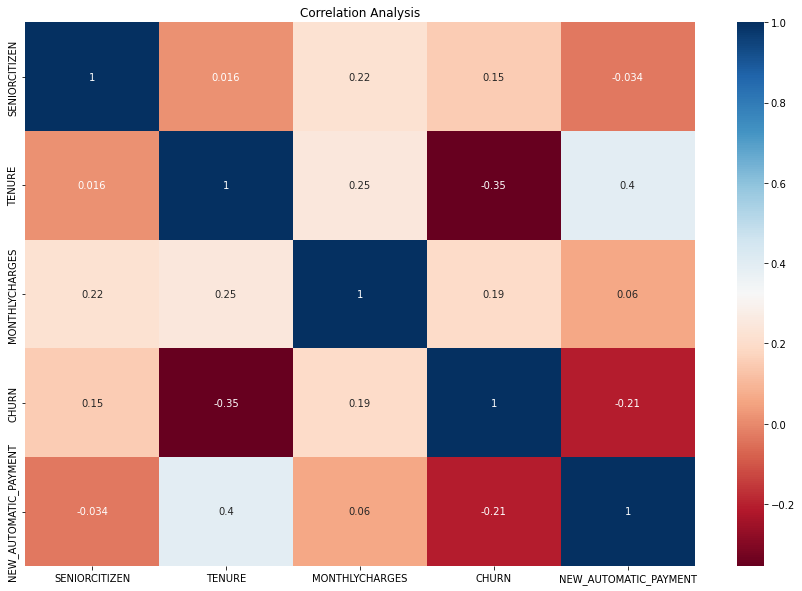

In [24]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='RdBu')
plt.title('Correlation Analysis')
plt.show()

### Removing Correlated Features

In [25]:
def correlation(dataset, threshold):
    
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    
    return col_corr

In [26]:
corr_features = correlation(df, 0.8)
corr_features

set()

In [27]:
df = df.drop(corr_features,axis=1)

### Chisquare Analysis for Categorical Columns

In [28]:
categorical_columns = [i for i in df.columns if df[i].dtype == 'O']

In [29]:
categorical_columns

['GENDER',
 'PARTNER',
 'DEPENDENTS',
 'PHONESERVICE',
 'MULTIPLELINES',
 'INTERNETSERVICE',
 'ONLINESECURITY',
 'ONLINEBACKUP',
 'DEVICEPROTECTION',
 'TECHSUPPORT',
 'STREAMINGTV',
 'STREAMINGMOVIES',
 'CONTRACT',
 'PAPERLESSBILLING',
 'PAYMENTMETHOD']

In [30]:
def chi_square_analysis(dataframe,target,categorical_columns):
    chi2_check = []
    for variable in categorical_columns:
        if chi2_contingency(pd.crosstab(dataframe[target], dataframe[variable]))[1] < 0.05:
            chi2_check.append('Reject Null Hypothesis')
        else:
            chi2_check.append('Failed to Reject Null Hypothesis')
    res = pd.DataFrame(data = [categorical_columns, chi2_check] ).T 
    res.columns = ['Variable', 'Hypothesis']
    res = res.sort_values(by='Hypothesis')
    return res

In [31]:
chi_square_analysis(df,'CHURN',categorical_columns)

,Variable,Hypothesis
0,GENDER,Failed to Reject Null Hypothesis
3,PHONESERVICE,Failed to Reject Null Hypothesis
1,PARTNER,Reject Null Hypothesis
2,DEPENDENTS,Reject Null Hypothesis
4,MULTIPLELINES,Reject Null Hypothesis
5,INTERNETSERVICE,Reject Null Hypothesis
6,ONLINESECURITY,Reject Null Hypothesis
7,ONLINEBACKUP,Reject Null Hypothesis
8,DEVICEPROTECTION,Reject Null Hypothesis
9,TECHSUPPORT,Reject Null Hypothesis


-  Gender and Phoneservice are not significance 

### Mutual Information

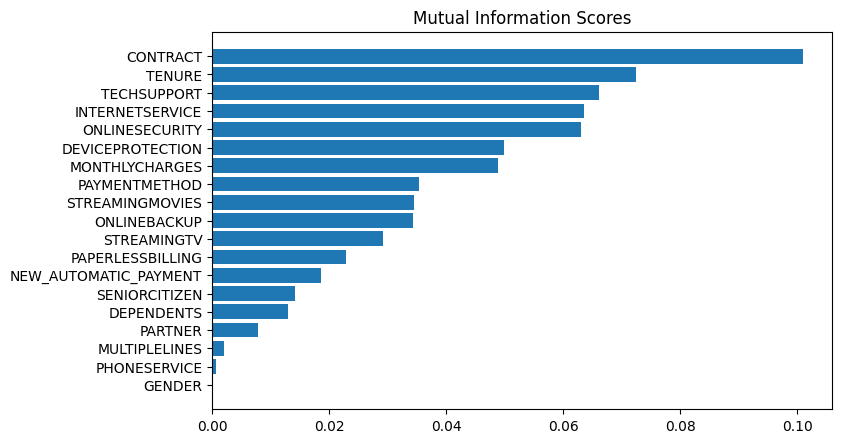

In [32]:
X = df.copy()
y = X.pop('CHURN')

for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

    
discrete_features = X.dtypes == int


def make_mi_scores(X, y, discrete_features):
    
    
    
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

#### - We see that Gender,Multiple Lines has 0 score 

In [33]:
def filter_by_mi_scores(dataframe,score,mi_scores,target):
    list_ = mi_scores[mi_scores>score].index
    return pd.concat([dataframe[list_],df[target]],axis=1)

#### Creating MI Scores 

In [47]:
df2 = filter_by_mi_scores(df,0.03,mi_scores,'CHURN')

In [48]:
X = df2.copy()
y = X.pop('CHURN')
X = pd.get_dummies(X)

In [49]:
print('Total Columns : ',df2.shape[1])
df2.head()

Total Columns :  11


,CONTRACT,TENURE,TECHSUPPORT,INTERNETSERVICE,ONLINESECURITY,DEVICEPROTECTION,MONTHLYCHARGES,PAYMENTMETHOD,STREAMINGMOVIES,ONLINEBACKUP,CHURN
0,Month-to-month,1,No,DSL,No,No,29.850,Electronic check,No,Yes,0
1,One year,34,No,DSL,Yes,Yes,56.950,Mailed check,No,No,0
2,Month-to-month,2,No,DSL,Yes,No,53.850,Mailed check,No,Yes,1
3,One year,45,Yes,DSL,Yes,Yes,42.300,Bank transfer (automatic),No,No,0
4,Month-to-month,2,No,Fiber optic,No,No,70.700,Electronic check,No,No,1


#### Checking Model with filtered features using Mutual Information

In [163]:
        models = [('LR', LogisticRegression()),
                  ('CART', DecisionTreeClassifier(random_state=1)),
                  ('RF', RandomForestClassifier(random_state=1,n_estimators=300)),
                  ('SVC', SVC(random_state=1)),
                  ('GBM', GradientBoostingClassifier(random_state=1)),
                  ("XGBoost", XGBClassifier(eval_metric='logloss')),
                  ("LightGBM", LGBMClassifier(random_state=1))]

        for name, classifier in models:
            cv_results = cross_validate(classifier, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc",'recall','precision'])
            accuracy = cv_results['test_accuracy'].mean()
            f1_score = cv_results['test_f1'].mean()
            roc_auc_score = cv_results['test_roc_auc'].mean()
            recall_score = cv_results['test_recall'].mean()
            precision_score = cv_results['test_precision'].mean()
            print(f'  {name}:Accuracy: {round(accuracy, 3)}, F1_Score: {round(f1_score, 3)}, Roc_auc_score:{round(roc_auc_score, 3)}, Recall: {round(recall_score, 3)}, Precision: {round(precision_score, 3)}')

  LR:Accuracy: 0.793, F1_Score: 0.573, Roc_auc_score:0.84, Recall: 0.522, Precision: 0.635
  CART:Accuracy: 0.724, F1_Score: 0.489, Roc_auc_score:0.657, Recall: 0.498, Precision: 0.482
  RF:Accuracy: 0.772, F1_Score: 0.53, Roc_auc_score:0.8, Recall: 0.484, Precision: 0.587
  SVC:Accuracy: 0.79, F1_Score: 0.5, Roc_auc_score:0.794, Recall: 0.396, Precision: 0.681
  GBM:Accuracy: 0.799, F1_Score: 0.578, Roc_auc_score:0.844, Recall: 0.518, Precision: 0.654
  XGBoost:Accuracy: 0.786, F1_Score: 0.563, Roc_auc_score:0.825, Recall: 0.519, Precision: 0.617
  LightGBM:Accuracy: 0.794, F1_Score: 0.574, Roc_auc_score:0.834, Recall: 0.521, Precision: 0.639


#### Model Performance without Gender ,Phone Service

#### Feature Selection with SHAP

In [37]:
X = df.copy()
y = X.pop('CHURN')

X = pd.get_dummies(X)

In [38]:
model = XGBClassifier(eval_metric='logloss')

In [39]:
model.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
explainer = shap.Explainer(model)

NameError: name 'shap' is not defined

In [137]:
shap_values = explainer.shap_values(X)

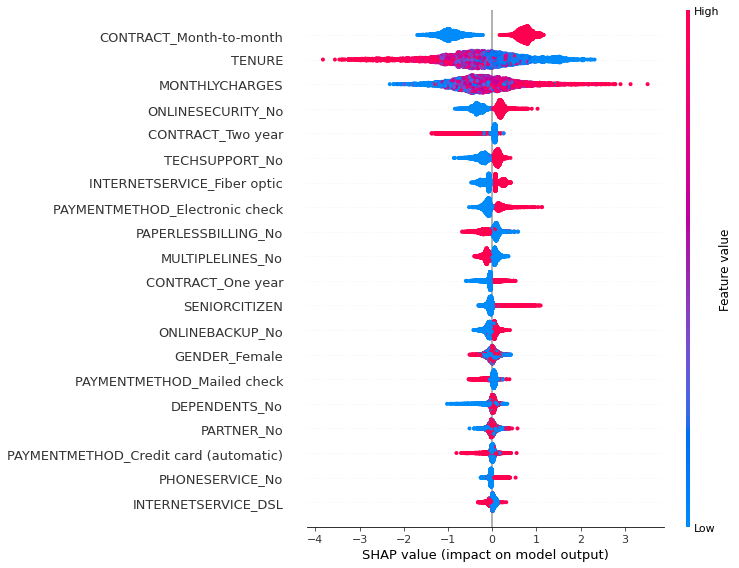

In [138]:
shap.summary_plot(shap_values, features=X, feature_names=X.columns)

In [46]:
df.head()

,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,ONLINEBACKUP,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,CHURN,NEW_AUTOMATIC_PAYMENT
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,0,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,0,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,1,0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,0,1
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,1,0


In [144]:
df3 = df.drop(['GENDER','PHONESERVICE','MULTIPLELINES'],axis=1)

In [145]:
X = df3.copy()
y = X.pop('CHURN')

X = pd.get_dummies(X)

In [146]:
df3.head()

,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,INTERNETSERVICE,ONLINESECURITY,ONLINEBACKUP,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,CHURN,NEW_AUTOMATIC_PAYMENT
0,0,Yes,No,1,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,0,0
1,0,No,No,34,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,0,0
2,0,No,No,2,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,1,0
3,0,No,No,45,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,0,1
4,0,No,No,2,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,1,0


In [156]:
df3.shape

(7032, 17)

In [147]:
        models = [('LR', LogisticRegression()),
                  ('CART', DecisionTreeClassifier(random_state=1)),
                  ('RF', RandomForestClassifier(random_state=1,n_estimators=300)),
                  ('SVC', SVC(random_state=1)),
                  ('GBM', GradientBoostingClassifier(random_state=1)),
                  ("XGBoost", XGBClassifier(objective='log_loss')),
                  ("LightGBM", LGBMClassifier(random_state=1))]

        for name, classifier in models:
            cv_results = cross_validate(classifier, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc"])
            accuracy = cv_results['test_accuracy'].mean()
            f1_score = cv_results['test_f1'].mean()
            roc_auc_score = cv_results['test_roc_auc'].mean()
            print(f'  {name}:Accuracy: {round(accuracy, 3)}, F1_Score: {round(f1_score, 3)}, Roc_auc_score:{round(roc_auc_score, 3)}')

  LR:Accuracy: 0.801, F1_Score: 0.592, Roc_auc_score:0.842
  CART:Accuracy: 0.728, F1_Score: 0.493, Roc_auc_score:0.657
  RF:Accuracy: 0.783, F1_Score: 0.545, Roc_auc_score:0.814
  SVC:Accuracy: 0.79, F1_Score: 0.503, Roc_auc_score:0.8
  GBM:Accuracy: 0.8, F1_Score: 0.579, Roc_auc_score:0.846
  XGBoost:Accuracy: nan, F1_Score: nan, Roc_auc_score:nan
  LightGBM:Accuracy: 0.796, F1_Score: 0.577, Roc_auc_score:0.835


In [148]:
df.head()

,GENDER,SENIORCITIZEN,PARTNER,DEPENDENTS,TENURE,PHONESERVICE,MULTIPLELINES,INTERNETSERVICE,ONLINESECURITY,ONLINEBACKUP,DEVICEPROTECTION,TECHSUPPORT,STREAMINGTV,STREAMINGMOVIES,CONTRACT,PAPERLESSBILLING,PAYMENTMETHOD,MONTHLYCHARGES,CHURN,NEW_AUTOMATIC_PAYMENT
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,0,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,0,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,1,0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,0,1
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,1,0


In [50]:
df2.to_csv('datasets\selected_features.csv',index=False)